# PHYS 7730 (Data Science) Problem Set Summary
By Kaixin Wang and Prof. Michael Vershinin

## Question 2: Gaussian Peak Filter
- Generate the 2d Homoscedastic Gaussian peak
- Apply random noise
- Obtain the mean and variance

### Mathematic background
Here is the full information about [*Multivariate normal distribution*](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

Here is the textbook and video you can check
- [Textbook: *Introduction to Linear Algebra, Glibert Strang*](https://math.mit.edu/~gs/linearalgebra/)
- [Video: *pseudoinverse*](https://www.youtube.com/watch?v=Go2aLo7ZOlU&t=6s)

<font size="4">

$G(x,y)=e^{-\frac{1}{2\sigma^2}[(x-\mu_x)^2+(y-\mu_y)^2]}$

$\ln G(x,y)=-\frac{1}{2\sigma^2}(x^2+y^2-2\mu_x x-2\mu_y y+\mu_x^2+\mu_y^2)=ax^2+by^2+cx+dy+e$

$$
\begin{bmatrix} 
    x_1^2 & y_1^2 & x_1 & y_1 & 1\\
    x_2^2 & y_2^2 & x_2 & y_2 & 1\\
    ... & ... & ... & ... & ...
\end{bmatrix}
\begin{bmatrix} 
    a\\
    b\\
    c\\
    d\\
    e
\end{bmatrix}=
\begin{bmatrix}
    \ln G_1\\
    \ln G_2\\
    \ln G_3\\
    ...
\end{bmatrix}
$$

Therefore,
$$
\begin{bmatrix} 
    a\\
    b\\
    c\\
    d\\
    e
\end{bmatrix}=
\begin{bmatrix} 
    x_1^2 & y_1^2 & x_1 & y_1 & 1\\
    x_2^2 & y_2^2 & x_2 & y_2 & 1\\
    ... & ... & ... & ... & ...
\end{bmatrix}^{-1}
\begin{bmatrix}
    \ln G_1\\
    \ln G_2\\
    \ln G_3\\
    ...
\end{bmatrix}=
\begin{bmatrix} 
    x_1^2 & y_1^2 & x_1 & y_1 & 1\\
    x_2^2 & y_2^2 & x_2 & y_2 & 1\\
    ... & ... & ... & ... & ...
\end{bmatrix}^*
\begin{bmatrix}
    \ln G_1\\
    \ln G_2\\
    \ln G_3\\
    ...
\end{bmatrix}
$$
</font>

<font size='4'>
In order to prevent tiny values in G series,

we can scale it by either *count_nonzero (solution 1)* or *square and let 0 to be a tiny number (solution 2)*.
</font>

Estimate for X location : [0.49955034]
Estimate for Y location : [0.30403895]
Estimate for peak width : [2.9805087]


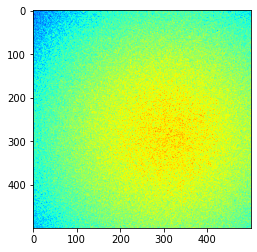

In [5]:
#Solution 1
import numpy as np
from numpy import linalg as LAn
from scipy import linalg as LAs
from numpy import matrix as M
from numpy import random as rnd
import matplotlib.pyplot as plt

N=500
#Let's define some x and y values
x, y=np.meshgrid(np.linspace(-2,2,N),np.linspace(-2,2,N));
#Ground truth mean in the X direction
loc1=0.5
#Ground truth mean in the Y direction
loc2=0.3
#Homoscedastic (same variance) for simplicity
sig=3; 
#Define the gaussian peak
Gauss2D = lambda X, Y, LX, LY, S : np.exp(                   \
                                   -np.power(X-LX,2)/(2*S*S) \
                                   -np.power(Y-LY,2)/(2*S*S))
g=Gauss2D(x,y,loc1,loc2,sig)+rnd.normal(0,1,(N,N))/10

#OK, now display the "data"
plt.imshow(g); plt.jet()

#Set up the Vandermonde matrix
#This needs polynomial terms to second order
xf = np.reshape(x,(N*N,1))
xf2= np.power(xf,2)
yf = np.reshape(y,(N*N,1))
yf2= np.power(yf,2)
cf = np.ones((N*N,1))
g  = np.reshape(g,(N*N,1))

#Our problem is that noise might drive some locations
#to have negative values and we won't be able to
#take the logarithm to linearize the exponent
#One way to solve this is to remove all such locations
#from our least square fit calculations

#My python is a bit clunky...
#Someone please suggest a more elegant syntax!
#Find all good locations
goodlocs=g>0.001
#Figure out how many such locations we found
ngood=np.count_nonzero(goodlocs)
#eliminate bad locations from all variables
#we will use in our fit
xf =np.reshape(xf[goodlocs],(ngood,1))
xf2=np.reshape(xf2[goodlocs],(ngood,1))
yf =np.reshape(yf[goodlocs],(ngood,1))
yf2=np.reshape(yf2[goodlocs],(ngood,1))
cf =np.reshape(cf[goodlocs],(ngood,1))
g  =np.reshape(g[goodlocs],(ngood,1))

#Set up Vandermonde matrix
VDM=np.concatenate((xf2, yf2, xf, yf, cf),axis=1)

#Set up the inversion problem and solve
a=np.dot(np.linalg.pinv(VDM),np.log(g))

#We now need to relate our fit coefficients
#to the parameters we are estimating
sigma_est=1/np.sqrt(-2*a[0])
loc1_est =a[2]*sigma_est*sigma_est
loc2_est =a[3]*sigma_est*sigma_est

#Show output
print('Estimate for X location : ' + str(loc1_est))
print('Estimate for Y location : ' + str(loc2_est))
print('Estimate for peak width : ' + str(sigma_est))

Estimate for X location : [0.49838162]
Estimate for Y location : [0.29549564]
Estimate for peak width : [2.97281425]


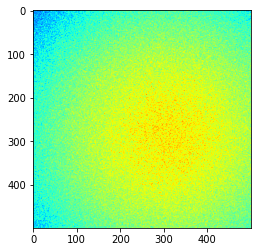

In [7]:
#Solution 2
import numpy as np
from numpy import linalg as LAn
from scipy import linalg as LAs
from numpy import matrix as M
from numpy import random as rnd
import matplotlib.pyplot as plt

N=500
#Let's define some x and y values
x, y=np.meshgrid(np.linspace(-2,2,N),np.linspace(-2,2,N))
#Ground truth mean in the X direction
loc1=0.5
#Ground truth mean in the Y direction
loc2=0.3
#Homoscedastic (same variance) for simplicity
sig=3
#Define the gaussian peak
Gauss2D = lambda X, Y, LX, LY, S : np.exp(                   \
                                   -np.power(X-LX,2)/(2*S*S) \
                                   -np.power(Y-LY,2)/(2*S*S))
g=Gauss2D(x,y,loc1,loc2,sig)+rnd.normal(0,1,(N,N))/10

#OK, now display the "data"
plt.imshow(g)
#Some folks wanted to get the same type of image as in homework
#That image was generated in matlab using colormap "jet"
#The colormap is indeed available in python
plt.jet()

#Set up the Vandermonde matrix
#This needs polynomial terms to second order
xf = np.reshape(x,(N*N,1))
xf2= np.power(xf,2)
yf = np.reshape(y,(N*N,1))
yf2= np.power(yf,2)
cf = np.ones((N*N,1))
gf = np.reshape(g,(N*N,1))

#Our problem is that noise might drive some locations
#to have negative values and we won't be able to
#take the logarithm to linearize the exponent
#Another way to address this problem is to scale the data
#so there are no problematic locations
#The easiest scaling approach is to square the data
gf2 = np.power(gf,2)

#Just to be sure, let's enforce no zeros in data^2
gf2[gf2<1e-16]=1e-16

#Set up Vandermonde matrix
VDM=np.concatenate((xf2, yf2, xf, yf, cf),axis=1)

#Set up the inversion problem and solve
a=np.dot(np.linalg.pinv(VDM),np.log(gf2))

#We now need to relate our fit coefficients
#to the parameters we are estimating
sigma_est=1/np.sqrt(-a[0])
loc1_est =a[2]*sigma_est*sigma_est/2
loc2_est =a[3]*sigma_est*sigma_est/2

#Show output
print('Estimate for X location : ' + str(loc1_est))
print('Estimate for Y location : ' + str(loc2_est))
print('Estimate for peak width : ' + str(sigma_est))

In [20]:
#Extra
#Our problem also asked us to worry about data with unknown
#offsets and scaling in z. Let's adapt the first solution above
#for this more general case.

import numpy as np
from numpy import linalg as LAn
from scipy import linalg as LAs
from numpy import matrix as M
from numpy import random as rnd
import matplotlib.pyplot as plt

N=500
#Let's define some x and y values
x, y=np.meshgrid(np.linspace(-2,2,N),np.linspace(-2,2,N))
#Ground truth mean in the X direction
loc1=0.5
#Ground truth mean in the Y direction
loc2=0.3
#Homoscedastic (same variance) for simplicity
sig=3
#Define the gaussian peak
Gauss2D = lambda X, Y, LX, LY, S : np.exp(                   \
                                   -np.power(X-LX,2)/(2*S*S) \
                                   -np.power(Y-LY,2)/(2*S*S))

#Let's use some offset (e.g. 3) and some scale factor (e.g. 2) 
gref=3+2*Gauss2D(x,y,loc1,loc2,sig)+rnd.normal(0,1,(N,N))/10

#We notice that just scaling and offsetting the data does not
#change the eyeball estimates for peak location and width 
#So let's just force g to have zero offset
#the scale factor for the gaussian is just a constant offset
#in the exponent so we will just ignore constant term in our fit
g=gref-np.min(gref)
#This offset is imperfect but let's see what we get

#Set up the Vandermonde matrix
#This needs polynomial terms to second order
xf = np.reshape(x,(N*N,1))
xf2= np.power(xf,2)
yf = np.reshape(y,(N*N,1))
yf2= np.power(yf,2)
cf = np.ones((N*N,1))
g  = np.reshape(g,(N*N,1))

#Our problem is that noise might drive some locations
#to have negative values and we won't be able to
#take the logarithm to linearize the exponent
#One way to solve this is to remove all such locations
#from our least square fit calculations

#My python is a bit clunky...
#Someone please suggest a more elegant syntax!
#Find all good locations
goodlocs=g>0.001
#Figure out how many such locations we found
ngood=np.count_nonzero(goodlocs)
#eliminate bad locations from all variables
#we will use in our fit
xf =np.reshape(xf[goodlocs],(ngood,1))
xf2=np.reshape(xf2[goodlocs],(ngood,1))
yf =np.reshape(yf[goodlocs],(ngood,1))
yf2=np.reshape(yf2[goodlocs],(ngood,1))
cf =np.reshape(cf[goodlocs],(ngood,1))
g  =np.reshape(g[goodlocs],(ngood,1))

#Set up Vandermonde matrix
VDM=np.concatenate((xf2, yf2, xf, yf, cf),axis=1)

#Set up the inversion problem and solve
a=np.dot(np.linalg.pinv(VDM),np.log(g))

#We now need to relate our fit coefficients
#to the parameters we are estimating
#We used a[4] in the past but now the scaling
#might not be perfect so let's ignore the
#constant term and just use the first coefficients
sigma_est=1/np.sqrt(-2*a[0])
loc1_est =a[2]*sigma_est*sigma_est
loc2_est =a[3]*sigma_est*sigma_est

#Show output
print('With iffy offset estimate we get the following:')
print('Estimate for X location : ' + str(loc1_est))
print('Estimate for Y location : ' + str(loc2_est))
print('Estimate for peak width : ' + str(sigma_est))

print('-----------------------------------------------')


### start the recursion ###
import scipy.stats as SciStat
#If we want to get fancy, we can figure out the noise from the residuals
#and figure out the likely value for the smallest deviation from zero
#from area under Gaussian curve for NxN amount of points

#i.e. if we have 3 values then 1 in 7 sample would be at 7 sigma
#and a 1 in 250000 value should sit at about 4.5 sigma
#you can check by norm.ppf()

offset=SciStat.norm.ppf(1-1/(N*N))*np.std(gref-Gauss2D(x,y,loc1_est,loc2_est,sigma_est))
#Now we can get a better idea of the true zero and redo fit
g=gref-np.min(gref)+offset

#Set up the Vandermonde matrix
#This needs polynomial terms to second order
xf = np.reshape(x,(N*N,1))
xf2= np.power(xf,2)
yf = np.reshape(y,(N*N,1))
yf2= np.power(yf,2)
cf = np.ones((N*N,1))
g  = np.reshape(g,(N*N,1))

#Our problem is that noise might drive some locations
#to have negative values and we won't be able to
#take the logarithm to linearize the exponent
#One way to solve this is to remove all such locations
#from our least square fit calculations

#My python is a bit clunky...
#Someone please suggest a more elegant syntax!
#Find all good locations
goodlocs=g>0.001
#Figure out how many such locations we found
ngood=np.count_nonzero(goodlocs)
#eliminate bad locations from all variables
#we will use in our fit
xf =np.reshape(xf[goodlocs],(ngood,1))
xf2=np.reshape(xf2[goodlocs],(ngood,1))
yf =np.reshape(yf[goodlocs],(ngood,1))
yf2=np.reshape(yf2[goodlocs],(ngood,1))
cf =np.reshape(cf[goodlocs],(ngood,1))
g  =np.reshape(g[goodlocs],(ngood,1))

#Set up Vandermonde matrix
VDM=np.concatenate((xf2, yf2, xf, yf, cf),axis=1)

#Set up the inversion problem and solve
a=np.dot(np.linalg.pinv(VDM),np.log(g))

#We now need to relate our fit coefficients
#to the parameters we are estimating
#We used a[4] in the past but now the scaling
#might not be perfect so let's ignore the
#constant term and just use the first coefficients
sigma_est=1/np.sqrt(-2*a[0])
loc1_est =a[2]*sigma_est*sigma_est
loc2_est =a[3]*sigma_est*sigma_est

#Show output
print('With better offset estimate we get the following:')
print('Estimate for X location : ' + str(loc1_est))
print('Estimate for Y location : ' + str(loc2_est))
print('Estimate for peak width : ' + str(sigma_est))

print('-----------------------------------------------')

#---------------------------------------------
#Now let's assume we know the offset perfectly
#---------------------------------------------
g=gref-3

#Set up the Vandermonde matrix
#This needs polynomial terms to second order
xf = np.reshape(x,(N*N,1))
xf2= np.power(xf,2)
yf = np.reshape(y,(N*N,1))
yf2= np.power(yf,2)
cf = np.ones((N*N,1))
g  = np.reshape(g,(N*N,1))

#Our problem is that noise might drive some locations
#to have negative values and we won't be able to
#take the logarithm to linearize the exponent
#One way to solve this is to remove all such locations
#from our least square fit calculations

#My python is a bit clunky...
#Someone please suggest a more elegant syntax!
#Find all good locations
goodlocs=g>0.001; 
#Figure out how many such locations we found
ngood=np.count_nonzero(goodlocs)
#eliminate bad locations from all variables
#we will use in our fit
xf =np.reshape(xf[goodlocs],(ngood,1))
xf2=np.reshape(xf2[goodlocs],(ngood,1))
yf =np.reshape(yf[goodlocs],(ngood,1))
yf2=np.reshape(yf2[goodlocs],(ngood,1))
cf =np.reshape(cf[goodlocs],(ngood,1))
g  =np.reshape(g[goodlocs],(ngood,1))

#Set up Vandermonde matrix
VDM=np.concatenate((xf2, yf2, xf, yf, cf),axis=1)

#Set up the inversion problem and solve
a=np.dot(np.linalg.pinv(VDM),np.log(g))

#We now need to relate our fit coefficients
#to the parameters we are estimating
#We used a[4] in the past but now the scaling
#might not be perfect so let's ignore the
#constant term and just use the first coefficients
sigma_est=1/np.sqrt(-2*a[0])
loc1_est =a[2]*sigma_est*sigma_est
loc2_est =a[3]*sigma_est*sigma_est

#Show output
print('With perfect offset estimate we get the following:')
print('Estimate for X location : ' + str(loc1_est))
print('Estimate for Y location : ' + str(loc2_est))
print('Estimate for peak width : ' + str(sigma_est))

With iffy offset estimate we get the following:
Estimate for X location : [0.50242624]
Estimate for Y location : [0.30348934]
Estimate for peak width : [2.15859216]
-----------------------------------------------
With better offset estimate we get the following:
Estimate for X location : [0.49942788]
Estimate for Y location : [0.30068998]
Estimate for peak width : [2.72830912]
-----------------------------------------------
With perfect offset estimate we get the following:
Estimate for X location : [0.49845677]
Estimate for Y location : [0.30000271]
Estimate for peak width : [2.99277643]


<font size='4'>

So the conclusion is that the offset for our data mostly matters for estimates of peak width but location estimates are pretty robust to overall offset.

By doing the recursion on offset estimate, it would get better peak width value.

And of course, scaling by a factor does not affect our estimates
</font>